<a href="https://colab.research.google.com/github/Aphilak660510747/229352-stat/blob/main/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [9]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [10]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [11]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [12]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

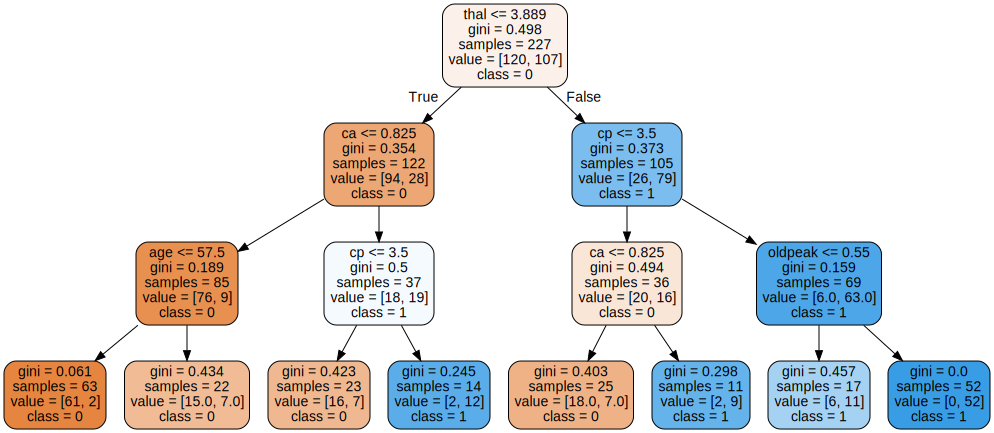

In [13]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [14]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [17]:
randao = RandomForestClassifier()
randao.fit(X_train, y_train)

RandomForestClassifier()

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits

สรุปผลลัพธ์ของแต่ละโมเดล

โมเดล: Decision Tree
  F1-macro: 0.8166
  Accuracy: 0.8167
  Hyperparameters ที่ดีที่สุด: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}

โมเดล: Bagged Decision Trees
  F1-macro: 0.9265
  Accuracy: 0.9267
  Hyperparameters ที่ดีที่สุด: {'classifier__max_features': 0.8, 'classifier__max_samples': 0.8, 'classifier__n_estimators': 100}

โมเดล: Random Forest
  F1-macro: 0.9333
  Accuracy: 0.9333
  Hyperparameters ที่ดีที่สุด: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 100}

โมเดลที่ดีที่สุดคือ: Random Forest ด้วยค่า Accuracy: 0.9333

กำลังสร้างกราฟ Decision Tree ที่ดีที่สุด...


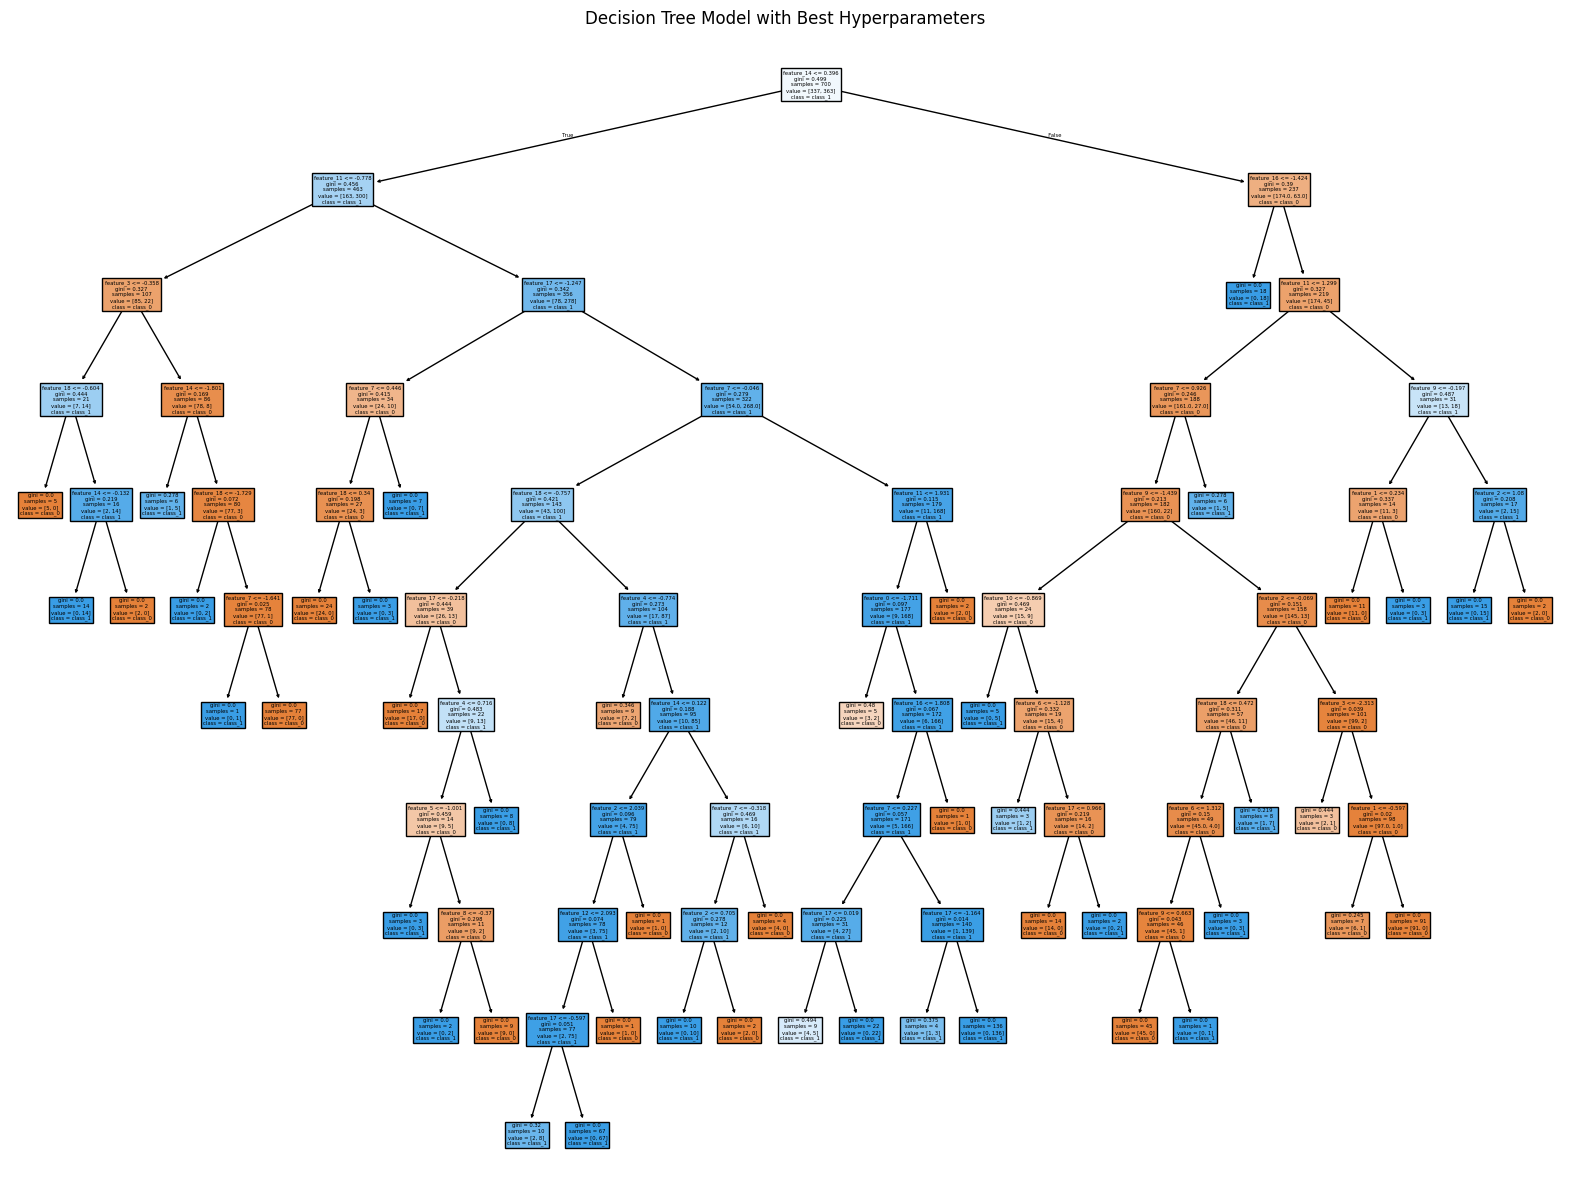

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# สร้างข้อมูลตัวอย่าง (Dummy Data)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# เตรียม dictionary สำหรับเก็บผลลัพธ์ของแต่ละโมเดล
results = {}

# --- Decision Tree ---
# สร้าง pipeline
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# กำหนด hyperparameters ที่จะทดสอบ (อธิบายในส่วนถัดไป)
dt_param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# ใช้ GridSearchCV เพื่อหา hyperparameter ที่ดีที่สุด
dt_grid = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
dt_grid.fit(X_train, y_train)

# ประเมินผล
dt_best_model = dt_grid.best_estimator_
y_pred_dt = dt_best_model.predict(X_test)
results['Decision Tree'] = {
    'f1_macro': f1_score(y_test, y_pred_dt, average='macro'),
    'accuracy': accuracy_score(y_test, y_pred_dt),
    'best_params': dt_grid.best_params_
}

# --- Bagged Decision Trees ---
# ใช้ Decision Tree เป็น base estimator
bag_dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', BaggingClassifier(DecisionTreeClassifier(random_state=42), random_state=42))
])

# กำหนด hyperparameters ที่จะทดสอบ
bag_dt_param_grid = {
    'classifier__n_estimators': [10, 50, 100],
    'classifier__max_samples': [0.5, 0.8, 1.0],
    'classifier__max_features': [0.5, 0.8, 1.0]
}

bag_dt_grid = GridSearchCV(bag_dt_pipeline, bag_dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
bag_dt_grid.fit(X_train, y_train)

# ประเมินผล
bag_dt_best_model = bag_dt_grid.best_estimator_
y_pred_bag_dt = bag_dt_best_model.predict(X_test)
results['Bagged Decision Trees'] = {
    'f1_macro': f1_score(y_test, y_pred_bag_dt, average='macro'),
    'accuracy': accuracy_score(y_test, y_pred_bag_dt),
    'best_params': bag_dt_grid.best_params_
}


# --- Random Forest ---
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# กำหนด hyperparameters ที่จะทดสอบ
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

# ประเมินผล
rf_best_model = rf_grid.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)
results['Random Forest'] = {
    'f1_macro': f1_score(y_test, y_pred_rf, average='macro'),
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'best_params': rf_grid.best_params_
}

# --- สรุปผล ---
print("\n" + "="*50)
print("สรุปผลลัพธ์ของแต่ละโมเดล")
print("="*50)

best_model_name = ""
best_accuracy = 0
for model_name, metrics in results.items():
    print(f"\nโมเดล: {model_name}")
    print(f"  F1-macro: {metrics['f1_macro']:.4f}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Hyperparameters ที่ดีที่สุด: {metrics['best_params']}")
    if metrics['accuracy'] > best_accuracy:
        best_accuracy = metrics['accuracy']
        best_model_name = model_name

print("\n" + "="*50)
print(f"โมเดลที่ดีที่สุดคือ: {best_model_name} ด้วยค่า Accuracy: {best_accuracy:.4f}")
print("="*50)

# --- พล็อต Decision Tree ที่ดีที่สุด ---
print("\nกำลังสร้างกราฟ Decision Tree ที่ดีที่สุด...")
# ใช้โมเดล Decision Tree ที่ถูกปรับแล้ว
best_dt_classifier = dt_grid.best_estimator_.named_steps['classifier']

plt.figure(figsize=(20,15))
plot_tree(best_dt_classifier, filled=True, feature_names=[f'feature_{i}' for i in range(X.shape[1])], class_names=['class_0', 'class_1'])
plt.title("Decision Tree Model with Best Hyperparameters")
plt.show()